# IRIS FLOWER CLASSIFICATION

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Reading the dataset.

In [19]:
data=pd.read_csv("IRIS.csv")

In [21]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [27]:
data.shape

(150, 5)

In [29]:
data.size

750

### Insight of the dataset.

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [37]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [47]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [51]:
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


Text(0.5, 1.0, 'Sepal Length vs Sepal Width')

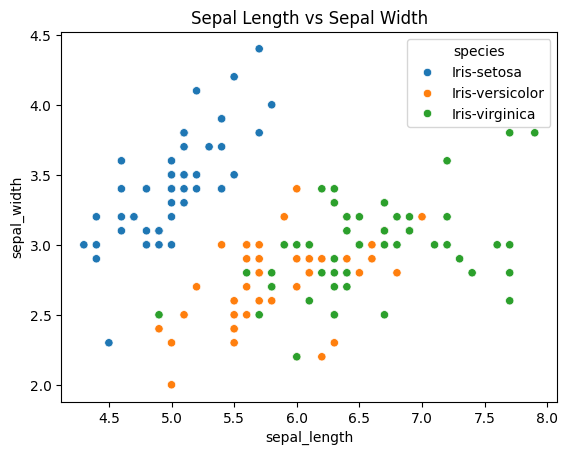

In [53]:
sns.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='species')
plt.title('Sepal Length vs Sepal Width')

Text(0.5, 1.0, 'petal Length vs petal Width')

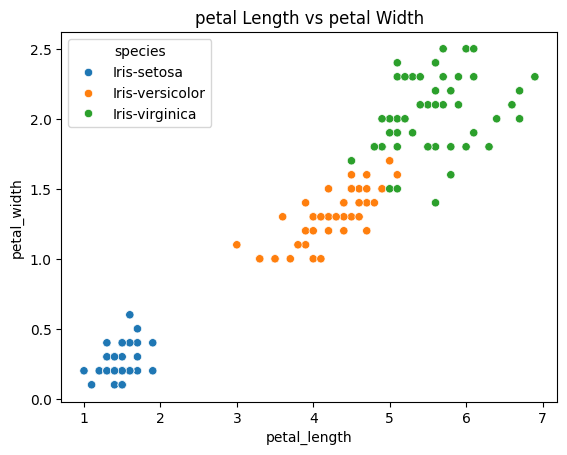

In [55]:
sns.scatterplot(data=data, x='petal_length', y='petal_width', hue='species')
plt.title('petal Length vs petal Width')

### Cleaning the data.

In [61]:
data['species']=data['species'].map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})

<Axes: >

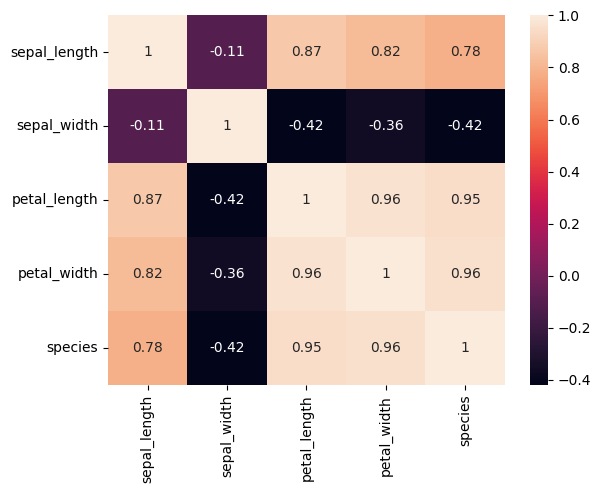

In [65]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
here only sepal width gives the wrong detection.

In [69]:
Iris_data=data.drop('sepal_width',axis=1)

In [71]:
Iris_data.head()

,sepal_length,petal_length,petal_width,species
0,5.1,1.4,0.2,1
1,4.9,1.4,0.2,1
2,4.7,1.3,0.2,1
3,4.6,1.5,0.2,1
4,5.0,1.4,0.2,1


Text(0.5, 1.0, 'Sepal Length vs petal length')

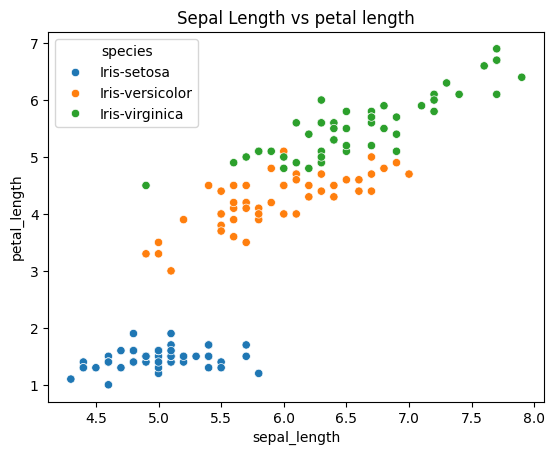

In [57]:
sns.scatterplot(data=data, x='sepal_length', y='petal_length', hue='species')
plt.title('Sepal Length vs petal length')

### Data selection.

In [75]:
X=Iris_data.drop('species',axis=1)
y=Iris_data['species']

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=100)

In [91]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 3)
(30, 3)
(120,)
(30,)


### Mobel Building.

In [93]:
logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [98]:
y_train_pred = logistic_model.predict(X_train)
acc = accuracy_score(y_train, y_train_pred)
acc

0.9666666666666667

In [104]:
y_test_pred = logistic_model.predict(X_test)
acc2 = accuracy_score(y_test, y_test_pred)
acc2

0.9666666666666667